# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [1]:
def F(n):
    for i in range(n):
        print("-" * (n - 1 - i), end='')

        for j in range(2*i + 1):
            print(chr(ord('A') + abs(j - i)), end='')
        
        print("-" * (n - 1 - i))

# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [2]:
def F(d : dict):
    # make list of 3-tuples (key, x, y) and use sort and a generic print function
    triples = [(k, d[k][0], d[k][1]) for k in d]
    
    # assumes t is sorted
    def print_triples():
        for i, j, k in triples:
            print(f"-{i}-, -{j}-, -{k}-")
    
    # by key, asc
    triples.sort(key = lambda x: x[0])
    print_triples()
    # by x, dsc
    triples.sort(key = lambda x: x[1], reverse=True)
    print_triples()
    # by y, asc
    triples.sort(key = lambda x: x[2])
    print_triples()

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-
-1-, -1-, -2-
-4-, -2-, -3-
-5-, --4-, -3-
-2-, --1-, -4-
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [3]:
file = open('student_records.csv', 'r')

# skip over header line
next(file)

# read the file into a list of lists

# ~4000 rows and 6 fields is small enough for this
# if it were too big, one can use `for line in file` iterator
# to process line by line
data = []
for line in file:
    row = line.strip().split(',')
    row[0] = int(row[0])  # roll no
    row[2] = int(row[2])  # credits
    data.append(row)

for i, row in enumerate(data):
    print(','.join(map(str, row)))
    if i >= 9:
        break

588946,MA,3,EC250,hasmed_elective,AB
145372,EP,4,EP407,hasmed_elective,CC
834515,MA,8,EP885,hasmed_elective,BB
344265,CSE,6,CSE699,honours,AB
358405,MA,3,EE460,minor,AP
781075,CE,8,CE540,honours,CC
180828,CSE,6,CE880,minor,AB
981238,MM,4,CSE226,minor,AB
836881,MM,8,MM530,core,AA
310604,EE,8,EE202,core,AB


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [4]:
letter_grades = {
    'AP': 10,
    'AA': 10,
    'AB': 9,
    'BB': 8,  # assuming this is a typo in the above
    'BC': 7,
    'CC': 6
}

# roll_no: [weighted_sum, total_credits]
students = {}

for roll, _, credits, _, _, grade in data:
    grade = letter_grades[grade]
    
    if not students.get(roll):
        students[roll] = [0, 0]

    students[roll][0] += credits * grade
    students[roll][1] += credits

for r in students:
    CPI = students[r][0] / students[r][1]
    print(f"{r}: {CPI:.2f}")  # print upto 2 dec places

588946: 8.69
145372: 7.75
834515: 8.22
344265: 8.70
358405: 8.59
781075: 8.17
180828: 8.10
981238: 8.24
836881: 8.39
310604: 8.33
847809: 8.21
773982: 8.07
500658: 8.17
810863: 8.15
124663: 8.13
364146: 8.40
871746: 8.21
270007: 8.03
597353: 8.12
986057: 8.07
718510: 8.43
836431: 7.90
379479: 8.25
582912: 8.66
788020: 8.02
613401: 8.44
144528: 8.16
485484: 8.36
680096: 8.05
199713: 8.29
851029: 8.32
845623: 8.38
150503: 8.29
214270: 7.88
517837: 8.58
482623: 8.40
721490: 8.34
955757: 8.29
589528: 8.73
143856: 8.49
571782: 8.42
973158: 8.51
703403: 8.34
960395: 8.63
521087: 7.91
461971: 8.29
879634: 8.74
716985: 8.18
194063: 8.14
265922: 8.35
283796: 8.82
203200: 8.79
301135: 8.33
327122: 8.16
381526: 8.43
534763: 7.93
391848: 8.44
329535: 8.23
971123: 7.96
207443: 8.30
488661: 8.60
782129: 8.54
928288: 8.51
581858: 8.05
733782: 8.42
282482: 8.29
572815: 8.32
608952: 8.33
628849: 8.72
630568: 8.24
388969: 8.31
159438: 8.38
478606: 8.32
995208: 7.78
841365: 7.99
870642: 8.02
970791: 8.12

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [5]:
indices = {
    'core': 0,
    'department_elective': 1,
    'felxible_elective': 2,
    'hasmed_elective': 3
}

# roll_no: [core, dep_elec, flex_elec, hasmed_elec]
students = {}

for roll, _, credits, _, ctype, _ in data:
    index = indices.get(ctype)
    
    # course is not one of core, dep elec, flex elec, hasmed elec
    if index is None:
        continue
    
    if not students.get(roll):
        students[roll] = [0, 0, 0, 0]
    
    students[roll][index] += credits

for r in students:
    if students[r][0] >= 20 and students[r][1] >= 15 and students[r][2] >= 10 and students[r][3] >= 5:
        print(r)

#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [6]:
# roll_no: { dept: minor_credits, ... }
students = {}

for roll, dept, credits, _, ctype, _ in data:
    # course is not a minor
    if ctype != 'minor':
        continue
    
    if not students.get(roll):
        students[roll] = {}
    
    if not students[roll].get(dept):
        students[roll][dept] = 0
    
    students[roll][dept] += credits

for r in students:
    for dept in students[r]:
        if students[r][dept] >= 10:
            print(r)
            break

358405
180828
981238
847809
270007
781075
986057
124663
364146
517837
721490
150503
571782
716985
194063
265922
482623
329535
207443
810863
973158
143142
970791
907454
888886
608522
608952
143856
773982
960395
283796
461584
879634
597353
845623
465496
718510
534763
680096
836881
787967
344265
581858
391848
485484
775967
138296
381526
681499
816041
971123
199713
630568
379479
362471
703403
388969
836431
582912
381227
478606
159438
733782
782129
144528
851029
881983
458200
998293
628849
995208
613401
301135
500658
488661
788020
626000
955757
841365
750259
572815
521087
214270
461971
692318
145372
588946
834515
208100
871746
327122
581065
203200
294697
993835
282482


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [7]:
# roll_no: [core_credits, honour_credits]
students = {}

for roll, _, credits, _, ctype, _ in data:
    if not students.get(roll):
        students[roll] = [0, 0]
    
    # not checking dept coz every student can only have one dept
    # to do core and honours courses in
    if ctype == 'core':
        students[roll][0] += credits
    if ctype == 'honours':
        students[roll][1] += credits

for r in students:
    if students[r][0] >= 20 and students[r][1] >= 10:
        print(r)

588946
145372
834515
781075
836881
310604
773982
500658
810863
124663
364146
871746
986057
718510
379479
582912
788020
613401
144528
485484
199713
845623
150503
214270
517837
482623
721490
955757
589528
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
870642
970791
143142
998293
681499
888886
608522
362471
465496
208100
692318
626000
458200
581065
787967
750259
881983
294697


In [8]:

# close file
file.close()

# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [9]:
from scipy.optimize import minimize

f = lambda x: 2 * (x[0] - x[1] - 3) ** 2 + 4 * (x[0] + 2 * x[1] + 1)**4
# initial guess
x0 = (0, 0)

cons = [
    {'type': 'ineq', 'fun': lambda x: x[0] - x[1] + 3},
    {'type': 'ineq', 'fun': lambda x: 5 - (x[0] + 2)**2 - (x[1] + 1)**2}
]

res = minimize(f, x0, constraints=cons)
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7.345026216977383
       x: [ 2.349e-01 -9.285e-01]
     nit: 9
     jac: [-1.120e+01 -3.582e-01]
    nfev: 31
    njev: 9

# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [10]:
# x = sqrt3 * cos t
# y = sqrt3 * sin t
# 0 <= t <= 2pi

import numpy as np
from scipy.integrate import quad

# sqrt3 for |γ'(t)|
f = lambda t: np.sqrt(3) * (3 * (np.cos(t))**2 + 9 * (np.sin(t))**4)

integral = quad(f, 0, 2 * np.pi)
integral[0]

53.053631403850865

# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [11]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [12]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    # from https://numpy.org/doc/2.1/user/how-to-io.html
    return np.loadtxt(data_path, delimiter=',')

In [13]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        # generate indices using randint in [0, N) of size K
        init_centers = data[np.random.randint(0, data.shape[0], size=(K,))]
    return init_centers
    

In [14]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(shape=(data.shape[0],))

In [15]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    # from https://numpy.org/doc/stable/user/basics.broadcasting.html
    # reshape data    (N, 2) -> (N, 1, 2)
    # reshape centers (K, 2) -> (1, K, 2)
    # then take norm along 3rd axis

    data = data[:, np.newaxis, :]
    centers = centers[np.newaxis, :, :]

    return np.linalg.norm(data - centers, axis=2)

In [16]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.array([np.argmin(d) for d in distances])

In [17]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    # sum[0], sum[1], count for every k=0,...K-1
    means = np.zeros(shape=(K,3))

    for i, label in enumerate(labels):
        means[label][0] += data[i][0]
        means[label][1] += data[i][1]
        means[label][2] += 1
        
    centers = np.empty(shape=(K,2))

    for i, (total_x, total_y, count) in enumerate(means):
        centers[i][0] = total_x / count
        centers[i][1] = total_y / count
        
    return centers

In [18]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.all(labels1 == labels2)

In [19]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [20]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title("K-means clustering")

    ### Set xlabel as 'Longitude'
    plt.xlabel("Longitude")

    ### Set ylabel as 'Latitude'
    plt.ylabel("Latitude")

    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0


<module 'matplotlib.pyplot' from 'c:\\Users\\susha\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

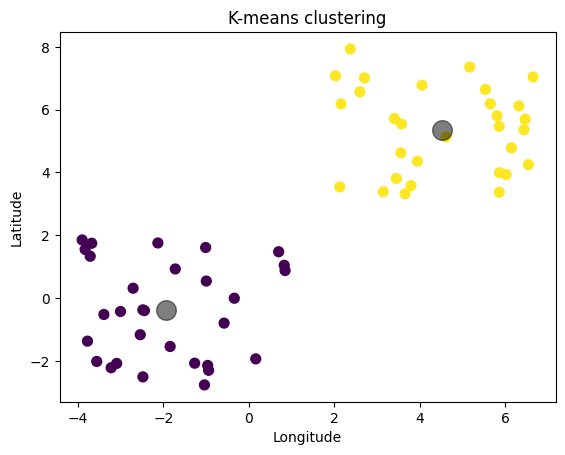

In [21]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)